In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = pd.read_csv("mamographic.csv",sep=',', na_values=["?"])
print(file.tail())

     BI-RADS   Age  Shape  Margin  Density  Severity
956      4.0  47.0    2.0     1.0      3.0         0
957      4.0  56.0    4.0     5.0      3.0         1
958      4.0  64.0    4.0     5.0      3.0         0
959      5.0  66.0    4.0     5.0      3.0         1
960      4.0  62.0    3.0     3.0      3.0         0


In [5]:
file.isnull().values.any()

True

In [8]:
file.columns[file.isnull().any()]

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density'], dtype='object')

In [9]:
file.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.296142,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.706291,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [16]:
file['BI-RADS'].mode()

0    4.0
dtype: float64

In [17]:
file['Age'].mode()

0    59.0
dtype: float64

In [18]:
file['Shape'].mode()

0    4.0
dtype: float64

In [19]:
file['Margin'].mode()

0    1.0
dtype: float64

In [20]:
file['Density'].mode()

0    3.0
dtype: float64

In [21]:
file['BI-RADS'].fillna(file['BI-RADS'].mode()[0],inplace=True)
file['Age'].fillna(file['Age'].mode()[0],inplace=True)
file['Shape'].fillna(file['Shape'].mode()[0],inplace=True)
file['Margin'].fillna(file['Margin'].mode()[0],inplace=True)
file['Density'].fillna(file['Density'].mode()[0],inplace=True)

In [26]:
file.isnull().values.any()

False

In [27]:
file.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.295525,55.505723,2.762747,2.706556,2.917794,0.463059
std,0.705684,14.444586,1.243276,1.576272,0.365869,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


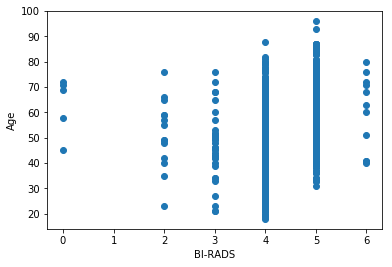

In [28]:
plt.scatter(file['BI-RADS'],file['Age'])
plt.xlabel('BI-RADS')
plt.ylabel('Age')
plt.show()

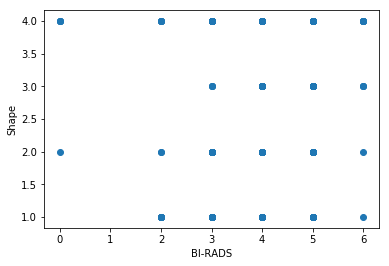

In [29]:
plt.scatter(file['BI-RADS'],file['Shape'])
plt.xlabel('BI-RADS')
plt.ylabel('Shape')
plt.show()

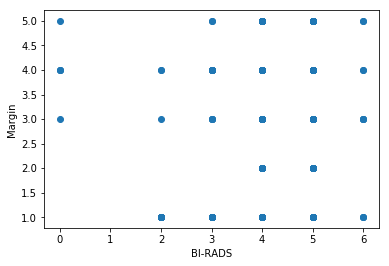

In [30]:
plt.scatter(file['BI-RADS'],file['Margin'])
plt.xlabel('BI-RADS')
plt.ylabel('Margin')
plt.show()

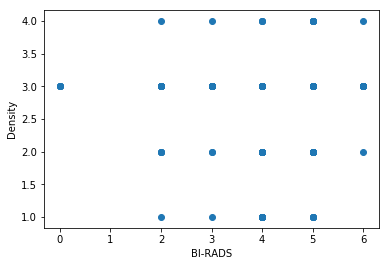

In [31]:
plt.scatter(file['BI-RADS'],file['Density'])
plt.xlabel('BI-RADS')
plt.ylabel('Density')
plt.show()

In [39]:
file_subset = file[['BI-RADS','Age','Shape','Margin','Density']]
file_subset['BI-RADS'].fillna(file['BI-RADS'].mode()[0],inplace=True)
file_subset['Age'].fillna(file['Age'].mode()[0],inplace=True)
file_subset['Shape'].fillna(file['Shape'].mode()[0],inplace=True)
file_subset['Margin'].fillna(file['Margin'].mode()[0],inplace=True)
file_subset['Density'].fillna(file['Density'].mode()[0],inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [40]:
file_subset.isnull().values.any()

False

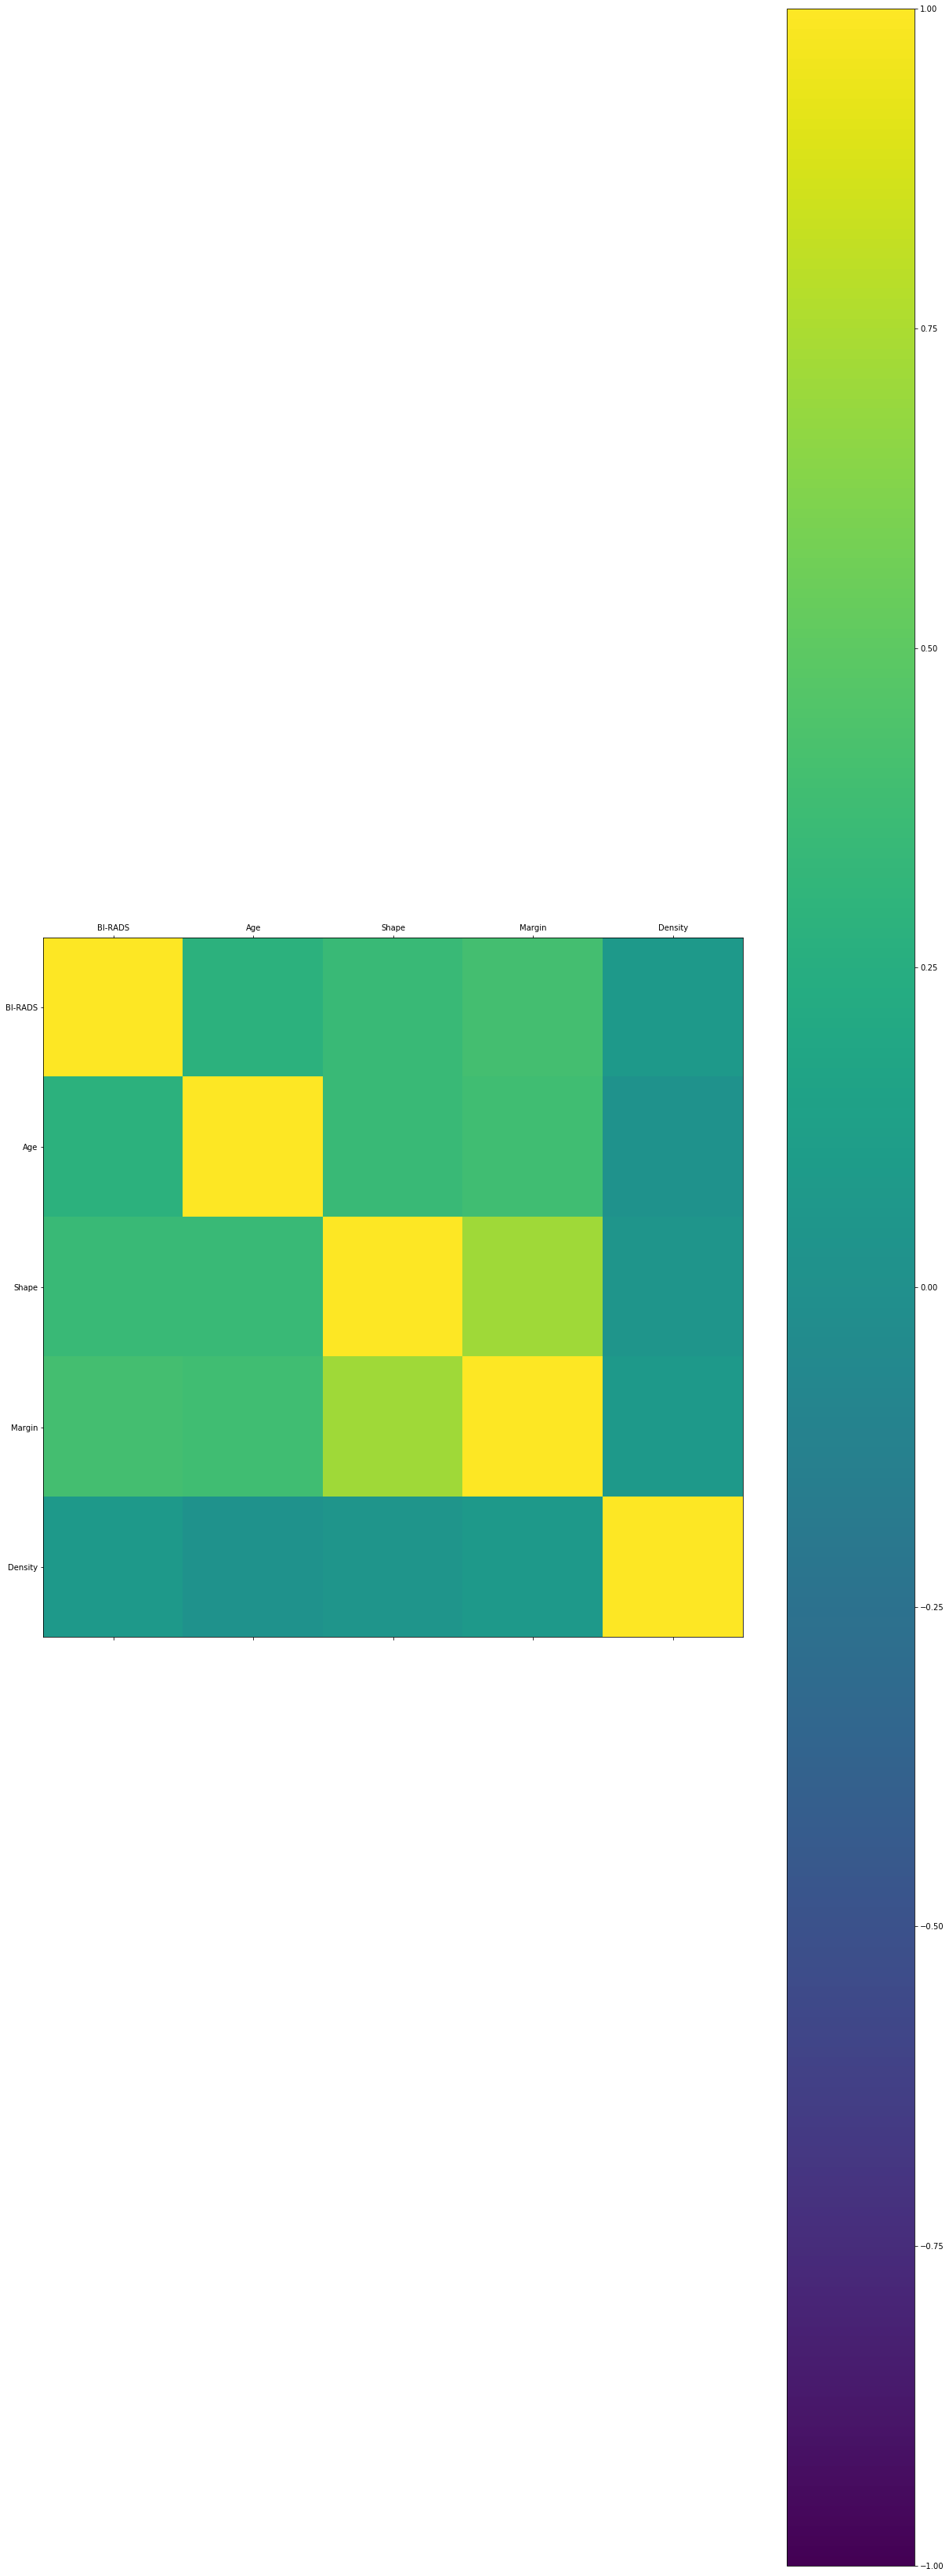

In [42]:
correlation = file_subset.corr()
fig = plt.figure(figsize=(20,60))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,vmin=-1,vmax=1)
ticks = np.arange(0,5,1)
fig.colorbar(cax)
names = ['BI-RADS','Age','Shape','Margin','Density']
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [23]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(file,test_size=0.2)
features_train=train[['BI-RADS','Age','Shape','Margin','Density']]
features_test = test[['BI-RADS','Age','Shape','Margin','Density']]
labels_train = train.Severity
labels_test = test.Severity
print(train.shape)
print(test.shape)
print(labels_test.head())

(768, 6)
(193, 6)
331    0
24     1
277    0
373    0
944    1
Name: Severity, dtype: int64


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2)]
for name,clf in zip(names,classifiers):
    clf.fit(features_train,labels_train)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.834196891192
Accuracy: 0.839378238342
Accuracy: 0.813471502591
Accuracy: 0.834196891192
Accuracy: 0.839378238342
Accuracy: 0.782383419689
Accuracy: 0.854922279793
Accuracy: 0.79274611399
Accuracy: 0.79274611399
Accuracy: 0.818652849741
Accuracy: 0.772020725389
